# Name: Akshay Nivrutti Vanjare

## Gmail: https://www.akshayvanjare8@gmail.com

## LinkedIn: https://www.linkedin.com/in/akshayvanjare

## GitHub: https://www.github.com/akshayvanjare8

# # Machine Learning Internship Task

### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [14]:
!pip install seaborn

     |████████████████████████████████| 283 kB 3.0 MB/s eta 0:00:01


In [15]:
import seaborn as sns

In [25]:
!pip install statsmodels

     |████████████████████████████████| 9.5 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 28.3 MB/s eta 0:00:01


In [26]:
import statsmodels.formula.api as smf
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, OneHotEncoder

### Downloading Data

In [2]:
!wget -O taskdata.csv https://raw.githubusercontent.com/anjumukesh/interns_task/main/taskdata.csv

--2020-10-28 15:05:25--  https://raw.githubusercontent.com/anjumukesh/interns_task/main/taskdata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.192.133, 151.101.128.133, 151.101.64.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.192.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 409866 (400K) [text/plain]
Saving to: ‘taskdata.csv’

taskdata.csv        100%[===================>] 400.26K  --.-KB/s    in 0.1s    

2020-10-28 15:05:26 (3.65 MB/s) - ‘taskdata.csv’ saved [409866/409866]



### Understanding the Data

### Reading the data in

In [3]:
df = pd.read_csv("taskdata.csv")

# take a look at the dataset
df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


### Task -1 Perform EDA

In [4]:
df.describe()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,4.407000e+03,4400.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,4.106655e+09,506.553864,22.335602,7.171576,9.874064,194.130365,16.942615,3.249388,72.119006,0.497844,338.851046,98.922260,16.812003,25.681004,27.622151,0.162009,0.103245
std,6.794948e+09,326.072756,43.591246,19.209092,5.169639,1548.361547,128.268824,5.509869,117.019515,1.199725,831.746150,297.692950,68.045904,55.324218,61.069006,0.517693,0.304313
min,4.100390e+05,111.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.184510e+08,226.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.142857,2.727273,0.000000,0.000000,13.500000,2.500000,4.461538,4.384615,0.000000,0.000000
50%,7.296626e+08,493.000000,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,40.000000,40.000000,6.333333,12.266667,12.933333,0.000000,0.000000
75%,7.292936e+09,1005.000000,30.000000,5.666667,14.000000,0.000000,0.000000,4.333333,100.000000,0.000000,327.280000,101.291667,14.250000,28.000000,30.784615,0.153846,0.000000
max,7.356031e+10,1017.000000,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4407 non-null   int64  
 1   account_id             4400 non-null   float64
 2   max_return_days        4407 non-null   int64  
 3   average_return_days    4407 non-null   float64
 4   customer_since_months  4407 non-null   int64  
 5   total_revenue          4407 non-null   float64
 6   average_revenue        4407 non-null   float64
 7   avg_vas_count          4407 non-null   float64
 8   avg_used_vas_value     4407 non-null   float64
 9   business_type          4407 non-null   int64  
 10  avg_wallet_bonus       4407 non-null   float64
 11  avg_active_ads         4407 non-null   float64
 12  avg_new_ads            4407 non-null   float64
 13  avg_email_replies      4407 non-null   float64
 14  avg_call_replies       4407 non-null   float64
 15  avg_

In [6]:
df.isnull().sum()

user_id                  0
account_id               7
max_return_days          0
average_return_days      0
customer_since_months    0
total_revenue            0
average_revenue          0
avg_vas_count            0
avg_used_vas_value       0
business_type            0
avg_wallet_bonus         0
avg_active_ads           0
avg_new_ads              0
avg_email_replies        0
avg_call_replies         0
avg_sms_replies          0
target                   0
dtype: int64

In [7]:
task = df.drop('user_id' , axis = 1)

task = task.drop('account_id' , axis = 1)

In [8]:
X = task.drop('target', axis = 1)
Y = task['target']

In [12]:
corr = X.corr()
print(corr)

                       max_return_days  average_return_days  \
max_return_days               1.000000             0.749094   
average_return_days           0.749094             1.000000   
customer_since_months        -0.186734            -0.256605   
total_revenue                -0.001811            -0.014424   
average_revenue               0.013263            -0.006545   
avg_vas_count                -0.112033            -0.108025   
avg_used_vas_value           -0.118764            -0.113959   
business_type                -0.019023             0.026801   
avg_wallet_bonus             -0.131315            -0.103527   
avg_active_ads               -0.042675            -0.046713   
avg_new_ads                  -0.008815            -0.016387   
avg_email_replies            -0.075633            -0.070537   
avg_call_replies             -0.079001            -0.070755   
avg_sms_replies              -0.050154            -0.038732   

                       customer_since_months  total_re

<AxesSubplot:>

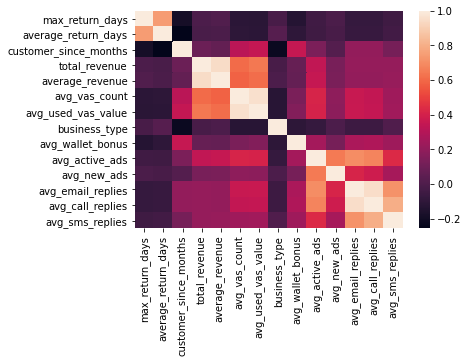

In [16]:
sns.heatmap(corr, xticklabels = cor.columns, yticklabels = cor.columns)

In [17]:
X = X.drop('total_revenue', axis = 1)

In [18]:
corr = X.corr()

<AxesSubplot:>

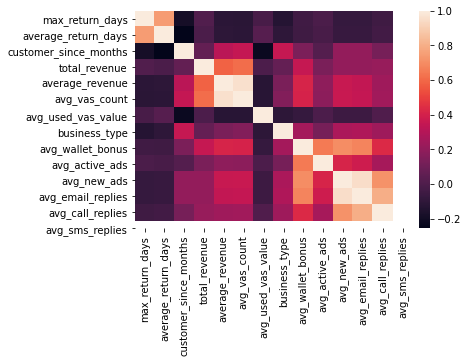

In [19]:
sns.heatmap(corr, xticklabels = cor.columns, yticklabels = cor.columns)

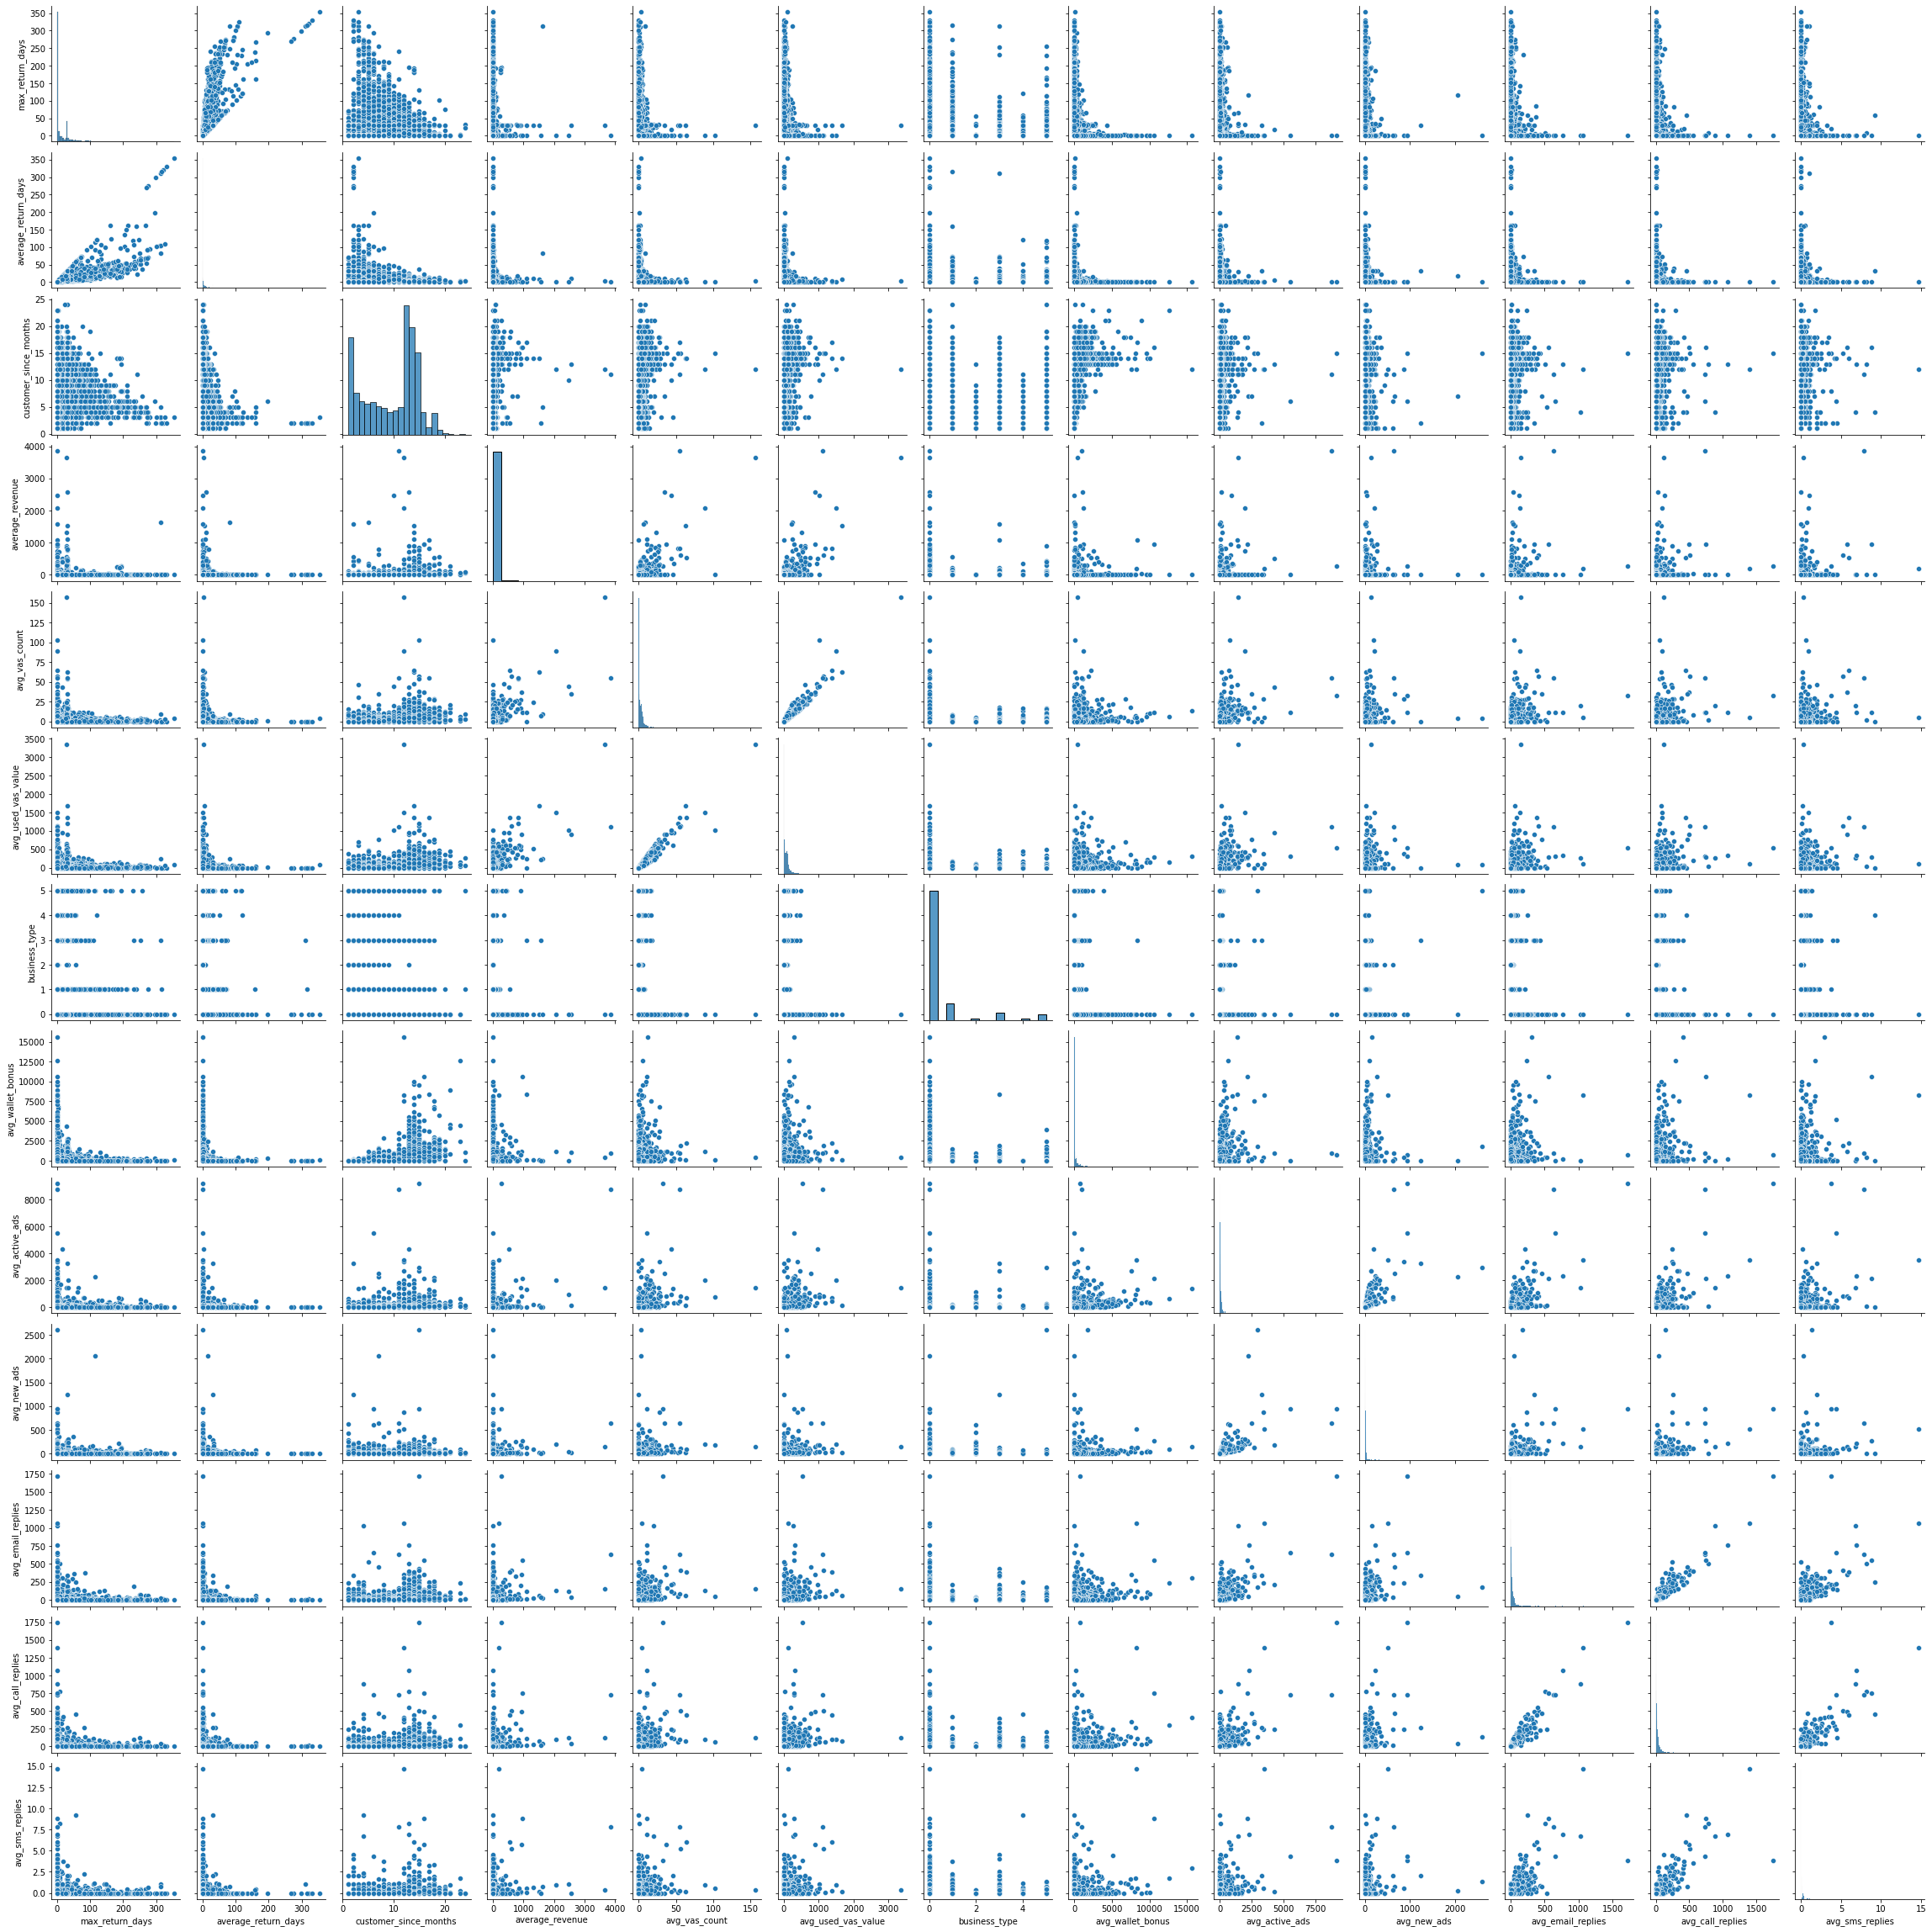

In [20]:
sns.pairplot(X)

<Figure size 432x288 with 0 Axes>

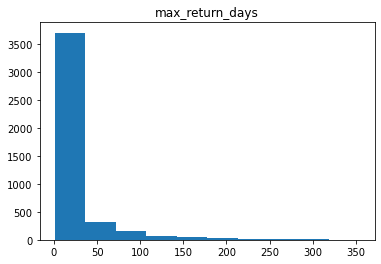

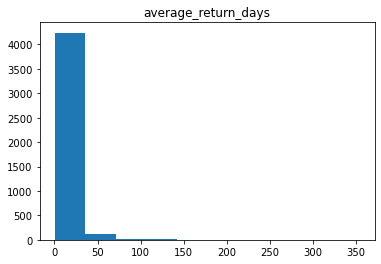

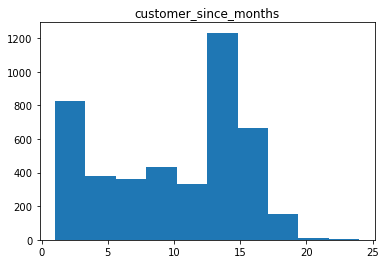

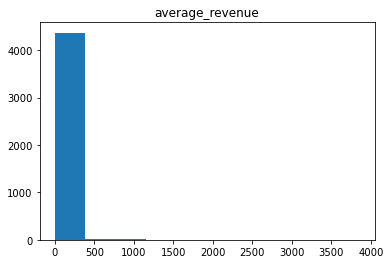

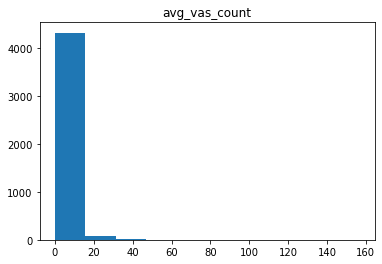

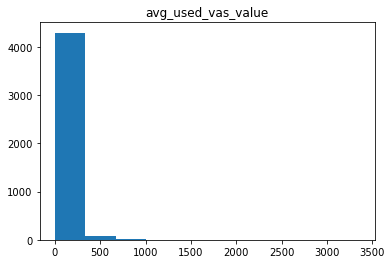

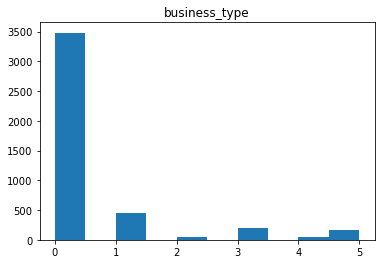

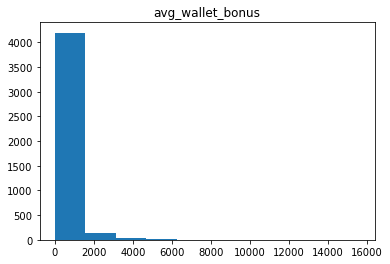

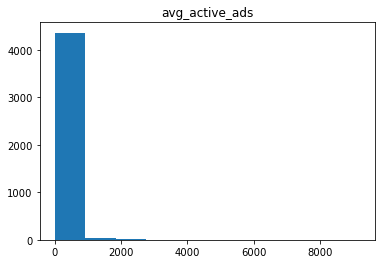

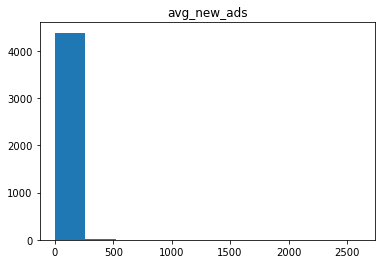

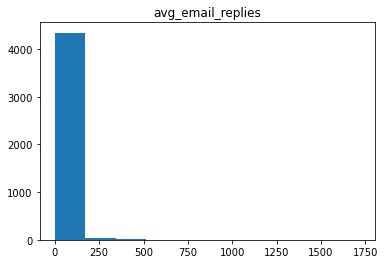

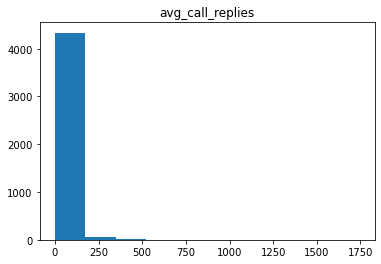

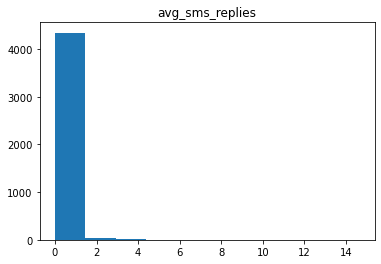

In [27]:
for idx,column in enumerate(X.columns):
    plt.figure(idx)
    X.hist(column = column, grid = False)

<Figure size 432x288 with 0 Axes>

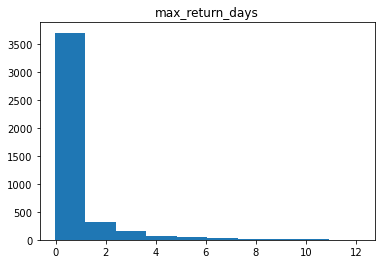

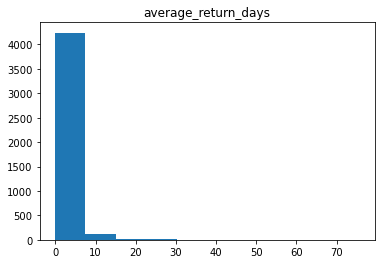

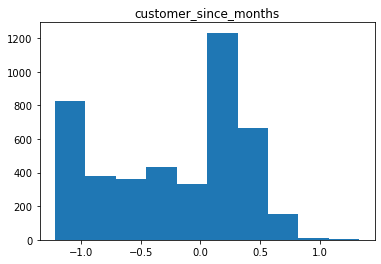

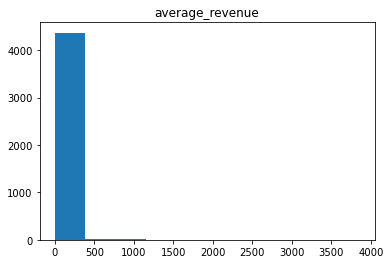

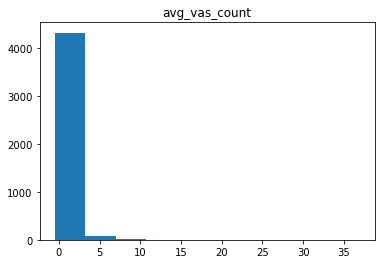

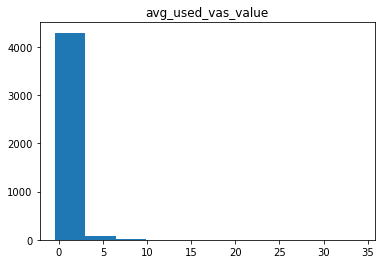

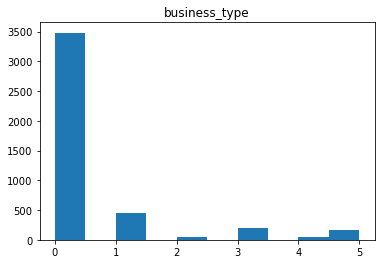

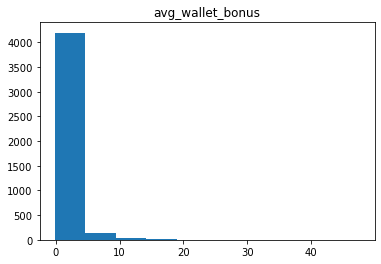

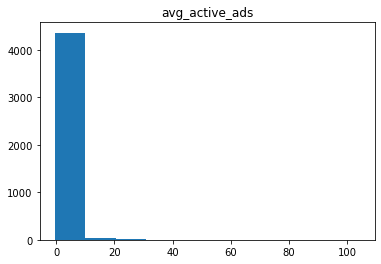

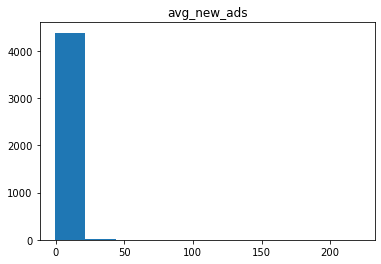

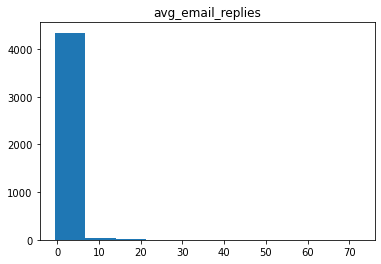

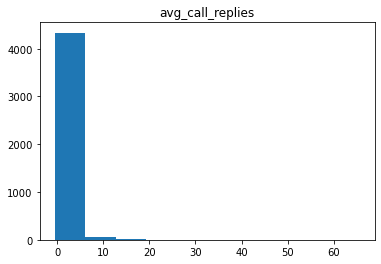

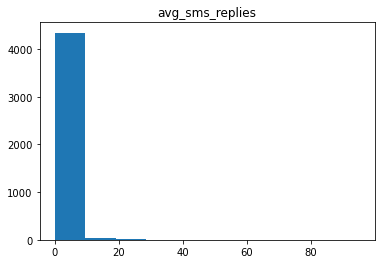

In [28]:
# Scaling all features

X_copy = X.copy()

rc = RobustScaler()

X_rc = rc.fit_transform(X_copy)

X_rc = pd.DataFrame(X_rc, columns = X.columns)

for idx,column in enumerate(X_rc.columns):
    plt.figure(idx)
    X_rc.hist(column = column, grid = False)

In [29]:
X.head()

,max_return_days,average_return_days,customer_since_months,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies
0,8,1.500000,14,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000
1,37,8.200000,10,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000
2,9,1.533333,15,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000
3,1,1.000000,14,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000
4,1,1.000000,18,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769


### Random Forest with all Features

In [31]:
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [33]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_rc, Y, test_size = 0.2)

In [34]:
clf = RandomForestClassifier(max_depth = 17, random_state = 0)
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred1)

0.9013605442176871

In [37]:
roc_auc_score(y_test, y_pred1)

0.5840803542499191

### Finding Important Features then Removing from DataFrame

In [43]:
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

list_one = []

features_ranking = SelectKBest(chi2, k = 5)

fit = features_ranking.fit(X,Y)

fmt = '%-8s%-20s%s'

for i, (score, feature) in enumerate(zip(features_ranking.scores_, X.columns)):
    list_one.append((score, feature))
    
dfobj = pd.DataFrame(list_one)
dfobj.sort_values(by = [0], ascending = False)

,0,1
7,53075.838893,avg_wallet_bonus
0,28348.311485,max_return_days
5,13807.374840,avg_used_vas_value
1,6225.394166,average_return_days
11,3370.135371,avg_call_replies
3,2750.353403,average_revenue
10,2626.987388,avg_email_replies
8,1902.918177,avg_active_ads
2,658.416190,customer_since_months
4,565.111904,avg_vas_count


In [44]:
X_rc.drop(['business_type','avg_sms_replies'], axis = 1, inplace = True)

In [45]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_rc, Y, test_size = 0.2)

In [48]:
clf1 = RandomForestClassifier(max_depth = 17, random_state = 0)
clf1.fit(X_train1, y_train1)
y_pred2 = clf1.predict(X_test1)

In [49]:
accuracy_score(y_test1, y_pred2)

0.9149659863945578

In [50]:
roc_auc_score(y_test1, y_pred2)

0.6092283031829631